In [1]:
from MIMIC import MIMIC

import numpy as np

## Zadanie 2. (4 punktów)
Zaimplementuj algorytm MIMIC, przedstawiony w ogólnym zarysie na wykładzie, a dokładnie opisany w artykule "MIMIC: Finding Optima by Estimating Probability Densities" (link do artykułu na stronie wykładu). Przeanalizuj działanie algorytmu na wybranych benchmarkach (w tym na problemie KDeceptiveOneMax) i otrzymane wyniki.

In [2]:
def deceptive(population):
    evals = population.sum(axis=1)
    evals[evals == 0] = population.shape[1] + 1
    return evals

def k_deceptive(population, k):
    idx_splits = np.linspace(0, population.shape[1], k+1).astype(int)
    evals = np.zeros(population.shape[0])
    
    for i in range(1, len(idx_splits)):
        evals += deceptive(population[:, idx_splits[i-1] : idx_splits[i]])
        
    return -evals

MIMIC: 100%|██████████| 50/50 [00:02<00:00, 20.58it/s]


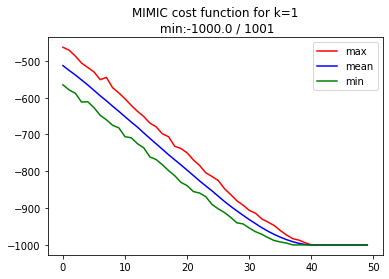

MIMIC: 100%|██████████| 50/50 [00:02<00:00, 19.98it/s]


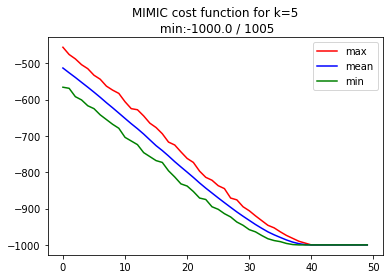

MIMIC: 100%|██████████| 50/50 [00:02<00:00, 19.36it/s]


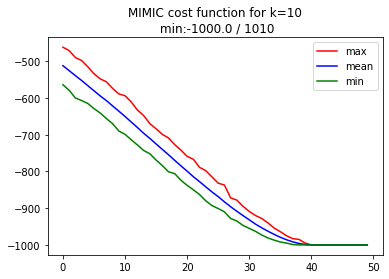

In [10]:
d = 1000
for k in [1, 5, 10]:
    mimic = MIMIC(N=1000, d=d, domain=(0, 1), epsilon=0.01, 
                  cost_func=lambda p: k_deceptive(p, k))
    mimic.run()
    mimic.plot_costs(f'for k={k}\n min:{mimic.min_cost.min()} / {-(d+k)}')